<a href="https://colab.research.google.com/github/ziadalaa7/AI-Network-Threat-Detection/blob/main/MileStone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🚨 AI-Powered Network Threat Detection

## Problem formulation



With the rapid increase in cyberattacks, traditional rule-based intrusion detection systems struggle to adapt to evolving threats. There is a need for an intelligent system that can automatically detect anomalies in real-time network traffic and differentiate between normal and malicious activities. The formulated problem is:
How can we design a scalable, adaptive, and accurate AI-powered system to detect suspicious activities in network traffic?


## Problem Description

This project aims to develop a machine learning–driven solution for network threat detection. The system leverages advanced AI methods such as anomaly detection, Natural Language Processing (for log analysis), and classification algorithms to recognize malicious behaviors. It analyzes multiple network features including packet flow rates, inter-arrival times, TCP flags, and communication patterns to detect threats such as:
- Distributed Denial of Service (DDoS) attacks
- Port scanning
- Brute-force login attempts
- Data exfiltration

Unlike traditional signature-based systems, this solution learns from new data and continuously adapts to emerging threats.


## Objectives


- Provide real-time monitoring of network traffic.
- Detect cyber threats early, before escalation.
- Automate alerts to reduce the workload on security teams.
- Ensure scalability to handle large volumes of traffic.
- Enhance cybersecurity resilience through proactive and adaptive defense mechanisms.


## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##Reading Dataset

In [2]:
df=pd.read_csv("/content/drive/MyDrive/dataset/depi grad project/full_data(final).zip")

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


## Data Cleaning

### Handling Missing Values

In [6]:
df.isna().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
Total Length of Bwd Packets,0
Fwd Packet Length Max,0
Fwd Packet Length Min,0
Fwd Packet Length Mean,0
Fwd Packet Length Std,0


In [7]:
(df.isna().sum()).sum()

np.int64(1358)

In [8]:
df.dropna(inplace=True)

In [9]:
(df.isna().sum()).sum()

np.int64(0)

### Check Duplicates

In [10]:
df.duplicated().sum()

np.int64(307376)

In [11]:
df.drop_duplicates(inplace=True,keep='first')

In [12]:
df.duplicated().sum()

np.int64(0)

### Handling Infinite and Negative Values

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2522009.0,8.701432e+03,1.902225e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2522009.0,1.658364e+07,3.522618e+07,-1.300000e+01,208.000000,50587.000000,5.330376e+06,1.200000e+08
Total Fwd Packets,2522009.0,1.027750e+01,7.942294e+02,1.000000e+00,2.000000,2.000000,6.000000e+00,2.197590e+05
Total Backward Packets,2522009.0,1.156751e+01,1.056668e+03,0.000000e+00,1.000000,2.000000,5.000000e+00,2.919220e+05
Total Length of Fwd Packets,2522009.0,6.116607e+02,1.058573e+04,0.000000e+00,12.000000,66.000000,3.320000e+02,1.290000e+07
Total Length of Bwd Packets,2522009.0,1.813569e+04,2.397602e+06,0.000000e+00,6.000000,156.000000,9.910000e+02,6.554530e+08
Fwd Packet Length Max,2522009.0,2.311241e+02,7.562104e+02,0.000000e+00,6.000000,40.000000,2.020000e+02,2.482000e+04
Fwd Packet Length Min,2522009.0,1.919733e+01,6.079830e+01,0.000000e+00,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd Packet Length Mean,2522009.0,6.347899e+01,1.955137e+02,0.000000e+00,6.000000,36.130841,5.200000e+01,5.940857e+03
Fwd Packet Length Std,2522009.0,7.728840e+01,2.968147e+02,0.000000e+00,0.000000,0.000000,7.417179e+01,7.125597e+03


In [14]:
def check_inf_neg(df):
  lst=[]
  for col in df.columns:
    if df[col].dtype in ["float64","int64"]:
      if (np.isinf(df[col]).any() or (df[col]<0).any()):
        lst.append(col)
  return lst
lst=check_inf_neg(df)

In [15]:
lst

[' Flow Duration',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Max',
 ' Flow IAT Min',
 ' Fwd IAT Min',
 ' Fwd Header Length',
 ' Bwd Header Length',
 ' Fwd Header Length.1',
 'Init_Win_bytes_forward',
 ' Init_Win_bytes_backward',
 ' min_seg_size_forward']

In [16]:
df[lst] = df[lst].replace([np.inf, -np.inf], np.nan)
df[lst] = df[lst].mask(df[lst] < 0)

In [17]:
df.isna().sum().sum()

np.int64(2133145)

In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302309 entries, 1 to 2830740
Data columns (total 79 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Destination Port             1302309 non-null  int64  
 1    Flow Duration                1302309 non-null  float64
 2    Total Fwd Packets            1302309 non-null  int64  
 3    Total Backward Packets       1302309 non-null  int64  
 4   Total Length of Fwd Packets   1302309 non-null  int64  
 5    Total Length of Bwd Packets  1302309 non-null  int64  
 6    Fwd Packet Length Max        1302309 non-null  int64  
 7    Fwd Packet Length Min        1302309 non-null  int64  
 8    Fwd Packet Length Mean       1302309 non-null  float64
 9    Fwd Packet Length Std        1302309 non-null  float64
 10  Bwd Packet Length Max         1302309 non-null  int64  
 11   Bwd Packet Length Min        1302309 non-null  int64  
 12   Bwd Packet Length Mean       130

### Feature Selecting

<Axes: >

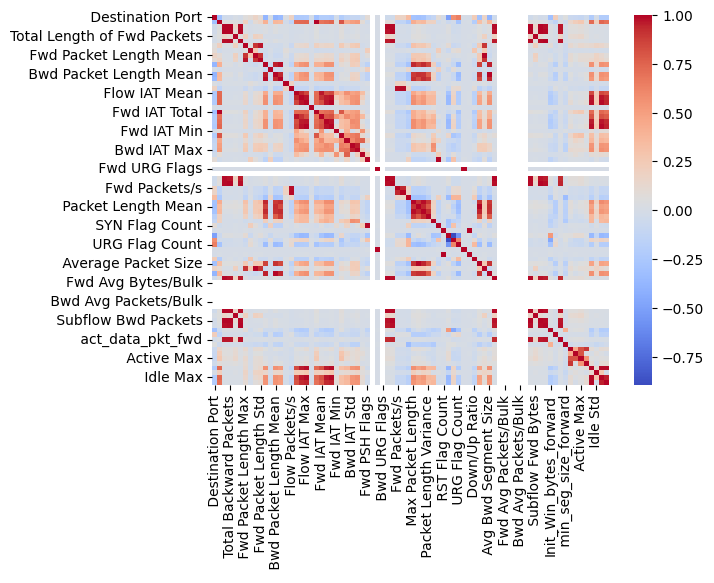

In [20]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm')

In [21]:
corr_abs = df.corr(numeric_only=True).abs()

upper_triangle = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

df = df.drop(to_drop, axis=1)

print(f"number of highly correlated columns = {len(to_drop)}")
print("the deleted columns are :")
print(to_drop)

number of highly correlated columns = 39
the deleted columns are :
[' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Std', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Bwd IAT Max', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count', ' ACK Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', ' act_data_pkt_fwd', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Max', ' Idle Min']


In [22]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Min,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Min Packet Length,FIN Flag Count,RST Flag Count,PSH Flag Count,URG Flag Count,Down/Up Ratio,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Idle Std,Label
1,55054,109.0,1,6,6,6,6,6,110091.7431,18348.62385,109.0,109.0,0.0,0,0.0,0.0,0,0,0,0,0,6,0,0,0,1,1,0,0,0,0,0,0,29.0,256.0,20.0,0.0,0.0,0.0,BENIGN
2,55055,52.0,1,6,6,6,6,6,230769.2308,38461.53846,52.0,52.0,0.0,0,0.0,0.0,0,0,0,0,0,6,0,0,0,1,1,0,0,0,0,0,0,29.0,256.0,20.0,0.0,0.0,0.0,BENIGN
3,46236,34.0,1,6,6,6,6,6,352941.1765,58823.52941,34.0,34.0,0.0,0,0.0,0.0,0,0,0,0,0,6,0,0,0,1,1,0,0,0,0,0,0,31.0,329.0,20.0,0.0,0.0,0.0,BENIGN
7,54925,42.0,1,6,6,6,6,6,285714.2857,47619.04762,42.0,42.0,0.0,0,0.0,0.0,0,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,0,32.0,256.0,20.0,0.0,0.0,0.0,BENIGN
14,36206,54.0,1,0,0,0,0,0,0.0000,37037.03704,54.0,54.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,939.0,1269.0,32.0,0.0,0.0,0.0,BENIGN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302309 entries, 1 to 2830740
Data columns (total 40 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Destination Port            1302309 non-null  int64  
 1    Flow Duration               1302309 non-null  float64
 2    Total Fwd Packets           1302309 non-null  int64  
 3   Total Length of Fwd Packets  1302309 non-null  int64  
 4    Fwd Packet Length Max       1302309 non-null  int64  
 5    Fwd Packet Length Min       1302309 non-null  int64  
 6   Bwd Packet Length Max        1302309 non-null  int64  
 7    Bwd Packet Length Min       1302309 non-null  int64  
 8   Flow Bytes/s                 1302309 non-null  float64
 9    Flow Packets/s              1302309 non-null  float64
 10   Flow IAT Mean               1302309 non-null  float64
 11   Flow IAT Min                1302309 non-null  float64
 12   Fwd IAT Min                 1302309 non-null  

<Axes: >

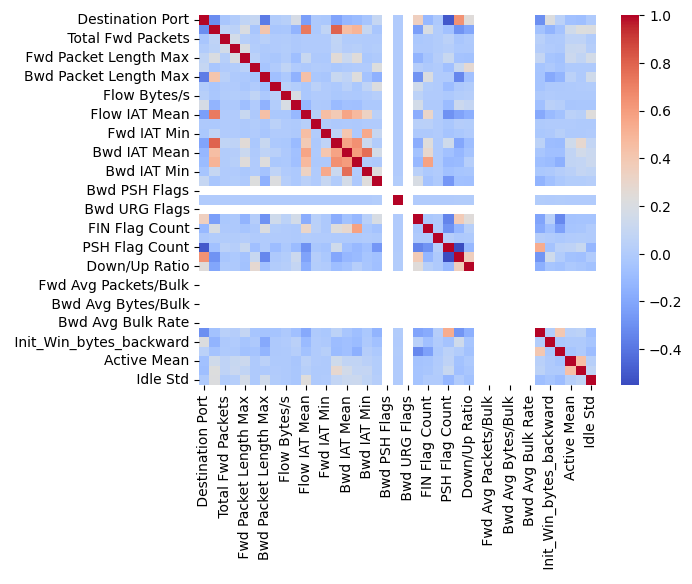

In [24]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm')

In [25]:
from sklearn.feature_selection import VarianceThreshold

# Use the DataFrame 'df' after removing highly correlated features
X = df.drop(' Label', axis=1)
y = df[' Label']

# This will remove all columns with zero variance
selector = VarianceThreshold(threshold=0)
X_new = selector.fit_transform(X)

# To see which columns were kept, you can do the following:
kept_columns = X.columns[selector.get_support()]
df = pd.DataFrame(X_new, columns=kept_columns)
df[' Label'] = y.values

print("Shape of DataFrame after removing zero-variance columns:", df.shape)

Shape of DataFrame after removing zero-variance columns: (1302309, 32)


<Axes: >

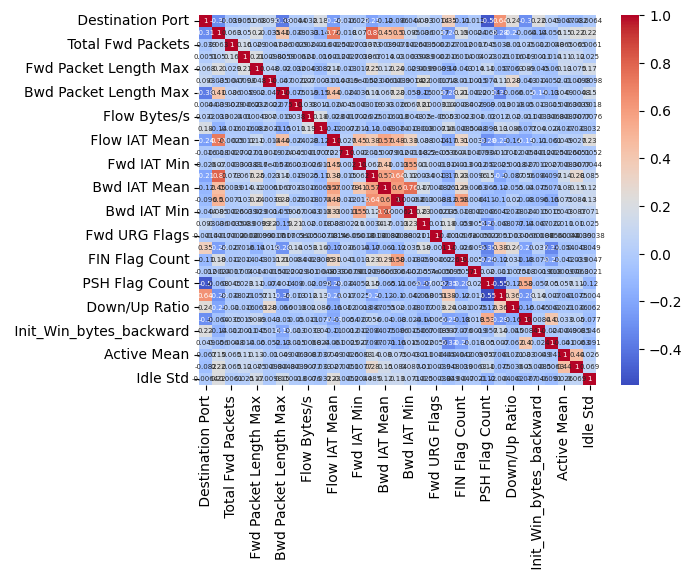

In [26]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True,annot_kws={"size":5})

### Target Variable Distribution

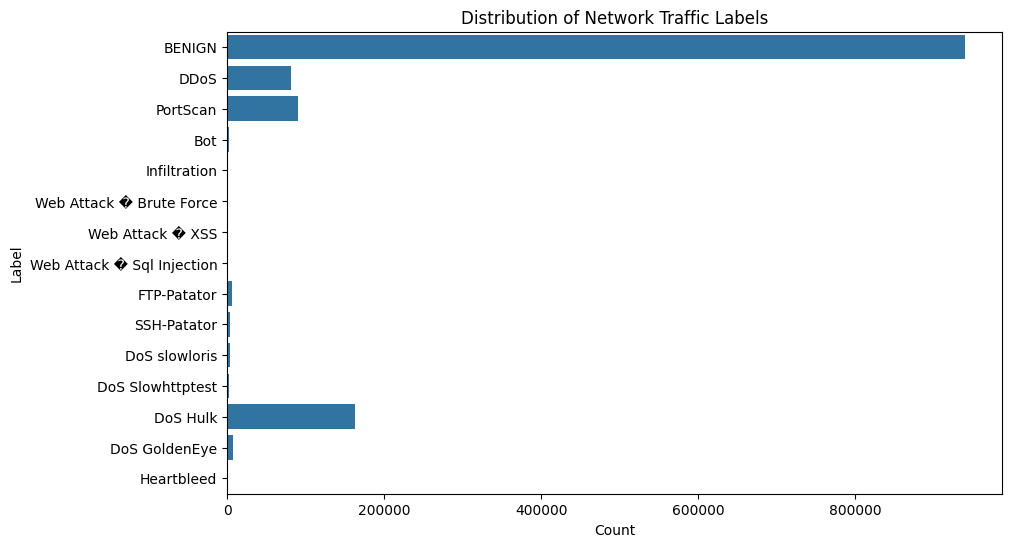

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y=' Label')
plt.title('Distribution of Network Traffic Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

In [28]:
df[" Label"].value_counts()

,count
Label,
BENIGN,940031
DoS Hulk,163457
PortScan,90630
DDoS,81471
DoS GoldenEye,7709
FTP-Patator,5864
DoS slowloris,3746
SSH-Patator,3205
DoS Slowhttptest,2083


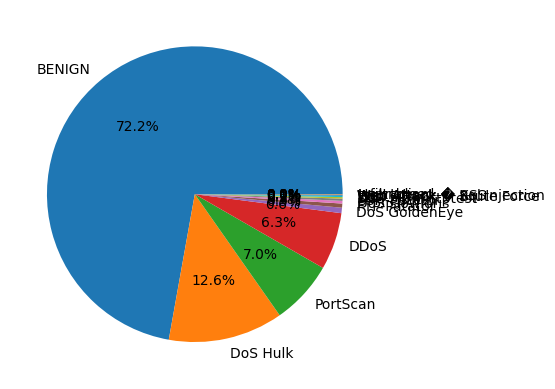

In [29]:
plt.pie(df[" Label"].value_counts(), labels=df[" Label"].value_counts().index, autopct='%1.1f%%');

In [30]:
mapping = {
    "DoS Hulk": "DoS/DDoS",
    "DoS GoldenEye": "DoS/DDoS",
    "DoS slowloris": "DoS/DDoS",
    "DoS Slowhttptest": "DoS/DDoS",
    "DDoS": "DoS/DDoS",

    "PortScan": "PortScan",

    "FTP-Patator": "Brute-Force",
    "SSH-Patator": "Brute-Force",
    "Web Attack � Brute Force": "Brute-Force",

    "Web Attack � XSS": "Web-App Attack",
    "Web Attack � Sql Injection": "Web-App Attack",

    "Bot": "Compromise / Botnet / Infiltration",
    "Infiltration": "Compromise / Botnet / Infiltration",

    "Heartbleed": "Heartbleed",

    "BENIGN": "BENIGN"
}

In [31]:
df["Target"]=df[" Label"].map(mapping)

In [32]:
df["Target"].value_counts()

,count
Target,
BENIGN,940031
DoS/DDoS,258466
PortScan,90630
Brute-Force,10539
Compromise / Botnet / Infiltration,1980
Web-App Attack,656
Heartbleed,7


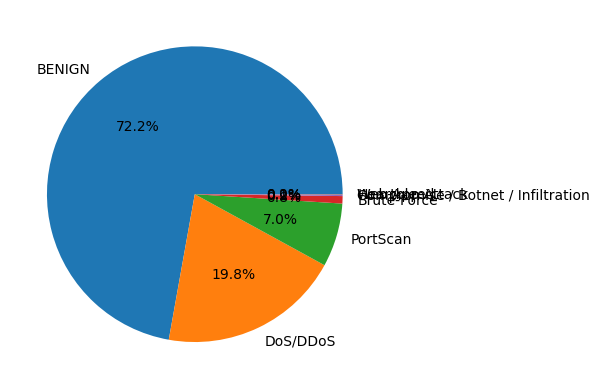

In [33]:
plt.pie(df["Target"].value_counts(), labels=df["Target"].value_counts().index,autopct='%1.1f%%');

In [34]:
df.drop(" Label",axis=1,inplace=True)

In [35]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Min,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Min Packet Length,FIN Flag Count,RST Flag Count,PSH Flag Count,URG Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Idle Std,Target
0,55054.0,109.0,1.0,6.0,6.0,6.0,6.0,6.0,110091.7431,18348.62385,109.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,29.0,256.0,20.0,0.0,0.0,0.0,BENIGN
1,55055.0,52.0,1.0,6.0,6.0,6.0,6.0,6.0,230769.2308,38461.53846,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,29.0,256.0,20.0,0.0,0.0,0.0,BENIGN
2,46236.0,34.0,1.0,6.0,6.0,6.0,6.0,6.0,352941.1765,58823.52941,34.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,31.0,329.0,20.0,0.0,0.0,0.0,BENIGN
3,54925.0,42.0,1.0,6.0,6.0,6.0,6.0,6.0,285714.2857,47619.04762,42.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,32.0,256.0,20.0,0.0,0.0,0.0,BENIGN
4,36206.0,54.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0000,37037.03704,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,939.0,1269.0,32.0,0.0,0.0,0.0,BENIGN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302309 entries, 0 to 1302308
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Destination Port            1302309 non-null  float64
 1    Flow Duration               1302309 non-null  float64
 2    Total Fwd Packets           1302309 non-null  float64
 3   Total Length of Fwd Packets  1302309 non-null  float64
 4    Fwd Packet Length Max       1302309 non-null  float64
 5    Fwd Packet Length Min       1302309 non-null  float64
 6   Bwd Packet Length Max        1302309 non-null  float64
 7    Bwd Packet Length Min       1302309 non-null  float64
 8   Flow Bytes/s                 1302309 non-null  float64
 9    Flow Packets/s              1302309 non-null  float64
 10   Flow IAT Mean               1302309 non-null  float64
 11   Flow IAT Min                1302309 non-null  float64
 12   Fwd IAT Min                 1302309 non-n

###Changing Datatype for memory

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302309 entries, 0 to 1302308
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Destination Port            1302309 non-null  float64
 1    Flow Duration               1302309 non-null  float64
 2    Total Fwd Packets           1302309 non-null  float64
 3   Total Length of Fwd Packets  1302309 non-null  float64
 4    Fwd Packet Length Max       1302309 non-null  float64
 5    Fwd Packet Length Min       1302309 non-null  float64
 6   Bwd Packet Length Max        1302309 non-null  float64
 7    Bwd Packet Length Min       1302309 non-null  float64
 8   Flow Bytes/s                 1302309 non-null  float64
 9    Flow Packets/s              1302309 non-null  float64
 10   Flow IAT Mean               1302309 non-null  float64
 11   Flow IAT Min                1302309 non-null  float64
 12   Fwd IAT Min                 1302309 non-n

In [38]:
float_cols = df.select_dtypes(include=['float64']).columns

In [39]:
float_cols

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Min', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Fwd URG Flags', ' Min Packet Length', 'FIN Flag Count',
       ' RST Flag Count', ' PSH Flag Count', ' URG Flag Count',
       ' Down/Up Ratio', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Idle Std'],
      dtype='object')

In [40]:
for col in df.select_dtypes(include=['float64']).columns:
    if (df[col] % 1 == 0).all():
        df[col] = df[col].astype(np.int32)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302309 entries, 0 to 1302308
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Destination Port            1302309 non-null  int32  
 1    Flow Duration               1302309 non-null  int32  
 2    Total Fwd Packets           1302309 non-null  int32  
 3   Total Length of Fwd Packets  1302309 non-null  int32  
 4    Fwd Packet Length Max       1302309 non-null  int32  
 5    Fwd Packet Length Min       1302309 non-null  int32  
 6   Bwd Packet Length Max        1302309 non-null  int32  
 7    Bwd Packet Length Min       1302309 non-null  int32  
 8   Flow Bytes/s                 1302309 non-null  float64
 9    Flow Packets/s              1302309 non-null  float64
 10   Flow IAT Mean               1302309 non-null  float64
 11   Flow IAT Min                1302309 non-null  int32  
 12   Fwd IAT Min                 1302309 non-n